<a href="https://colab.research.google.com/github/DechiWords/Python_Learn/blob/main/Analisis_Exploratorio_Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este cuaderno tiene la finalidad de estudiar mi actividad en los servicios de Google, en particular YouTube, con el fin de analizar el comportamiento y consumo audiovisual desde 2016 hasta Abril 2021.

Para la obtención de los datos utilizamos la herramienta **Google Takeout**.

#Importación y limpieza de datos

Importamos la librería **pandas** y **matplotlib.pyplot**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Importamos la base de datos

In [ ]:
Data = pd.read_json('/content/drive/MyDrive/Personal/Análisis datos Google/historial de reproducciones.json')

Leemos las primeras filas

In [ ]:
Data.head()

,header,title,titleUrl,subtitles,time,products,details,description
0,YouTube,Has visto Los cura no entienden a Dios,https://www.youtube.com/watch?v=dAvDnwXNZKk,"[{'name': 'MIGALA D', 'url': 'https://www.yout...",2021-04-09T18:12:53.903Z,[YouTube],NaN,NaN
1,YouTube,Has visto ¿Podría desaparecer el cine?,https://www.youtube.com/watch?v=_GIzgu9bJGg,"[{'name': 'MIGALA D', 'url': 'https://www.yout...",2021-04-09T17:54:04.623Z,[YouTube],NaN,NaN
2,YouTube,Has visto Cómo aprobar una entrevista técnica,https://www.youtube.com/watch?v=eZjQr331CVM,"[{'name': 'Platzi', 'url': 'https://www.youtub...",2021-04-09T17:08:21.867Z,[YouTube],NaN,NaN
3,YouTube,Has visto 10 errores comunes de programadores ...,https://www.youtube.com/watch?v=YJ0u-MpYpM4,"[{'name': 'Platzi', 'url': 'https://www.youtub...",2021-04-09T04:17:54.478Z,[YouTube],NaN,NaN
4,YouTube,Has visto ACLARACION INSTAGRAM OFICIAL,https://www.youtube.com/watch?v=3J82JN8C3As,"[{'name': 'tomiii 11', 'url': 'https://www.you...",2021-04-09T04:16:14.521Z,[YouTube],NaN,NaN


Eliminamos las columnas «header»,«details»,«description» y «products»

In [ ]:
Data.drop(columns = ['header','details','description','products'],inplace = True)

Verificamos los datos

In [ ]:
Data.head()

,title,titleUrl,subtitles,time
0,Has visto Los cura no entienden a Dios,https://www.youtube.com/watch?v=dAvDnwXNZKk,"[{'name': 'MIGALA D', 'url': 'https://www.yout...",2021-04-09T18:12:53.903Z
1,Has visto ¿Podría desaparecer el cine?,https://www.youtube.com/watch?v=_GIzgu9bJGg,"[{'name': 'MIGALA D', 'url': 'https://www.yout...",2021-04-09T17:54:04.623Z
2,Has visto Cómo aprobar una entrevista técnica,https://www.youtube.com/watch?v=eZjQr331CVM,"[{'name': 'Platzi', 'url': 'https://www.youtub...",2021-04-09T17:08:21.867Z
3,Has visto 10 errores comunes de programadores ...,https://www.youtube.com/watch?v=YJ0u-MpYpM4,"[{'name': 'Platzi', 'url': 'https://www.youtub...",2021-04-09T04:17:54.478Z
4,Has visto ACLARACION INSTAGRAM OFICIAL,https://www.youtube.com/watch?v=3J82JN8C3As,"[{'name': 'tomiii 11', 'url': 'https://www.you...",2021-04-09T04:16:14.521Z


Renombramos los nombres de las columnas para una manipulación personal más agradable

In [ ]:
Data.rename(columns = {'title':'Titulo','titleUrl':'URL','subtitles':'Datos del video','time':'Tiempo'}, inplace = True)
Data.head()

,Titulo,URL,Datos del video,Tiempo
0,Has visto Los cura no entienden a Dios,https://www.youtube.com/watch?v=dAvDnwXNZKk,"[{'name': 'MIGALA D', 'url': 'https://www.yout...",2021-04-09T18:12:53.903Z
1,Has visto ¿Podría desaparecer el cine?,https://www.youtube.com/watch?v=_GIzgu9bJGg,"[{'name': 'MIGALA D', 'url': 'https://www.yout...",2021-04-09T17:54:04.623Z
2,Has visto Cómo aprobar una entrevista técnica,https://www.youtube.com/watch?v=eZjQr331CVM,"[{'name': 'Platzi', 'url': 'https://www.youtub...",2021-04-09T17:08:21.867Z
3,Has visto 10 errores comunes de programadores ...,https://www.youtube.com/watch?v=YJ0u-MpYpM4,"[{'name': 'Platzi', 'url': 'https://www.youtub...",2021-04-09T04:17:54.478Z
4,Has visto ACLARACION INSTAGRAM OFICIAL,https://www.youtube.com/watch?v=3J82JN8C3As,"[{'name': 'tomiii 11', 'url': 'https://www.you...",2021-04-09T04:16:14.521Z


#Analisis de la visualización de canales

A continuación analizaremos los canales que han tenido una frecuencia de reproducción o busqueda más alta.

Anexamos a la variable «Datos_Video» la columna «Datos del video» eliminando los datos NaN que vivan dentro de ella

In [ ]:
Datos_Video = Data.loc[:,'Datos del video'].dropna(axis = 0)

Reiniciamos los índices y por consiguiente se convierte en un Data Frame, por ello eliminamos la columna «index»

In [ ]:
Datos_Video = Datos_Video.reset_index()
Datos_Video.drop('index',axis = 1,inplace = True)

Visualizamos el Data Frame resultante

In [ ]:
Datos_Video

,Datos del video
0,"[{'name': 'MIGALA D', 'url': 'https://www.yout..."
1,"[{'name': 'MIGALA D', 'url': 'https://www.yout..."
2,"[{'name': 'Platzi', 'url': 'https://www.youtub..."
3,"[{'name': 'Platzi', 'url': 'https://www.youtub..."
4,"[{'name': 'tomiii 11', 'url': 'https://www.you..."
...,...
22905,"[{'name': 'Statik Gamer', 'url': 'https://www...."
22906,"[{'name': 'Excélsior TV', 'url': 'https://www...."
22907,"[{'name': 'Davidpkami', 'url': 'https://www.yo..."
22908,"[{'name': 'Bendita', 'url': 'https://www.youtu..."


Notemos que un elemento del Data Frame es una lista que contiene un diccionario con dos claves y sus respectivos valores.

In [ ]:
Datos_Video.iloc[0]

Datos del video    [{'name': 'MIGALA D', 'url': 'https://www.yout...
Name: 0, dtype: object

Mediante un ciclo for definidos una lista en la cual extraemos el valor de la clave 'name' en cada uno de los diccionarios. Lo anexamos a la variable «Canales».

In [ ]:
Canales = list( Datos_Video.iloc[i][0][0]['name'] for i in range ( len(Datos_Video) ))

Construimos un Data Frame con estos datos para poder trabajar de manera más cómoda los datos resultantes.

In [ ]:
DF_Canales = pd.DataFrame({'Canales':Canales})

Visualizamos el Data Frame «DF_Canales»

In [ ]:
DF_Canales.head()

,Canales
0,MIGALA D
1,MIGALA D
2,Platzi
3,Platzi
4,tomiii 11


Mediante «value_counts» determinamos cuantas veces se repite cada uno de los valores del Data Frame, que en este caso son los canales visitados. Visualizamos los primeros diez elementos.

In [ ]:
DF_Canales.value_counts()[0:10]

Canales                 
DrossRotzank                751
Jeshua Revan                718
The Top Comics              541
levelup.com                 455
Tortilla Squad              435
3DJuegosMX                  415
MIGALA D                    380
TUBE RADIO                  297
Derivando                   291
El Pulso De La República    280
dtype: int64

Graficamos los resultados en un gráfico de barras.

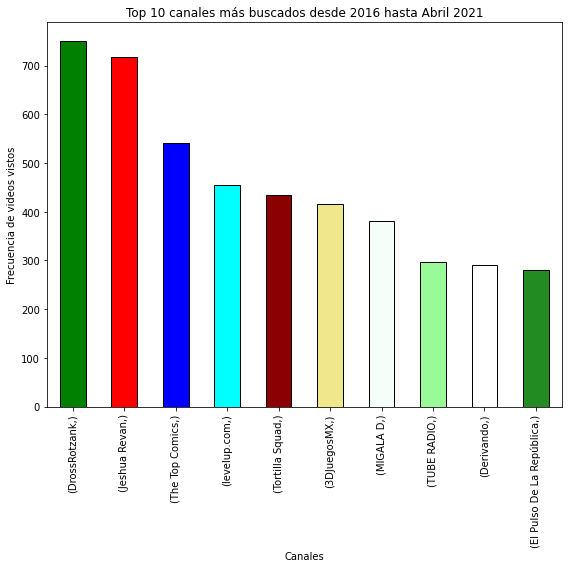

In [ ]:
DF_Canales.value_counts()[0:10].plot(kind = 'bar',figsize = (8,8),
                                     color = ['green','red','blue','cyan',
                                              'darkred','khaki','mintcream','palegreen',
                                              'white','forestgreen'],
                                     edgecolor = 'black')
plt.title('Top 10 canales más buscados desde 2016 hasta Abril 2021')
plt.ylabel('Frecuencia de videos vistos')
plt.tight_layout()

#Análisis de la visualización de videos por año

A continuación analizaremos la frecuencia de videos vistos por años.

Filtramos la columna «Tiempo» del Data Frame «Data» eliminando los valores nulos que existan en dicha columna, después reiniciamos los índices y eliminamos la columna «index» que se anexó de manera automática en el reinicio de los índices.

In [ ]:
Years_Data = Data.loc[:,'Tiempo'].dropna(axis = 0)
Years_Data = Years_Data.reset_index()
Years_Data.drop('index',axis = 1,inplace = True)

Visualizamos el Data Frame «Years_Data»

In [ ]:
Years_Data

,Tiempo
0,2021-04-09T18:12:53.903Z
1,2021-04-09T17:54:04.623Z
2,2021-04-09T17:08:21.867Z
3,2021-04-09T04:17:54.478Z
4,2021-04-09T04:16:14.521Z
...,...
25001,2016-07-31T23:36:32.909Z
25002,2016-07-31T23:28:13.022Z
25003,2016-07-31T23:20:23.698Z
25004,2016-07-31T23:19:53.819Z


Cada elemento del Data Frame es un dato tipo texto, str, entonces extraemos cada elemento y filtramos los caracteres del texto en una longitud YYYY. Guardamos estos resultados en la variable «Years» mediante una lista.

In [ ]:
Years = list( Years_Data.iloc[j][0][0:len('YYYY')]  for j in range (len(Years_Data)))

Definimos un Data Frame «DF_Years» para trabajar de manera más cómoda estos datos.

In [ ]:
DF_Years = pd.DataFrame({'Years':Years})

Visualizamos el Data Frame «DF_Years»

In [ ]:
DF_Years

,Years
0,2021
1,2021
2,2021
3,2021
4,2021
...,...
25001,2016
25002,2016
25003,2016
25004,2016


Mediante el método «value_counts()» contabilizamos el número de veces que se repite cada año en el Data Frame.

In [ ]:
DF_Years.value_counts()

Years
2019     6760
2018     6643
2020     4903
2017     4038
2016     1628
2021     1034
dtype: int64

Definimos dos listas, «DF_Years_X» contiene la representación de cada año del 2016 al 2021 y «DF_Years_Y» contiene los valores de la serie dadas en «DF_Years.value_counts()».

In [ ]:
DF_Years_X = list(k for k in range (2016,2022))
DF_Years_Y = list(DF_Years.value_counts()[str(k2)][0] for k2 in range (2016,2022) )

Graficamos los resultados.

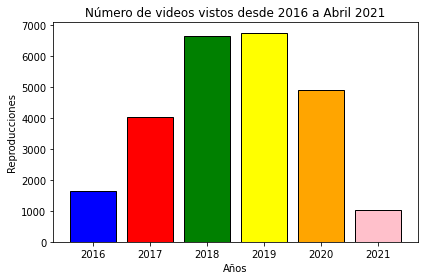

In [ ]:
plt.bar(DF_Years_X,DF_Years_Y,edgecolor = 'black',color = ['blue','red','green','yellow','orange','pink'])
plt.title('Número de videos vistos desde 2016 a Abril 2021')
plt.ylabel('Reproducciones')
plt.xlabel('Años')
plt.tight_layout()

# Análisis de visualización del top 10 de canales más buscados entre 2016 y 2021

A continuación analizaremos la cantidad de reproducciones hechas por año en cada uno de los canales top 10 obtenidos anteriormente.

Del Data Frame «Data» filtramos las columnas «Datos del video» y «Tiempo» eliminando las filas con valores nulos, reiniciando los índices y descartando la columna «index» creada por el reinicio de índices.

In [ ]:
Canal_per_Year = Data.loc[:,['Datos del video','Tiempo']].dropna(axis = 0)
Canal_per_Year = Canal_per_Year.reset_index()
Canal_per_Year.drop('index',axis = 1,inplace = True)

Visualizamos el Data Frame «Canal_per_Year»

In [ ]:
Canal_per_Year

,Datos del video,Tiempo
0,"[{'name': 'MIGALA D', 'url': 'https://www.yout...",2021-04-09T18:12:53.903Z
1,"[{'name': 'MIGALA D', 'url': 'https://www.yout...",2021-04-09T17:54:04.623Z
2,"[{'name': 'Platzi', 'url': 'https://www.youtub...",2021-04-09T17:08:21.867Z
3,"[{'name': 'Platzi', 'url': 'https://www.youtub...",2021-04-09T04:17:54.478Z
4,"[{'name': 'tomiii 11', 'url': 'https://www.you...",2021-04-09T04:16:14.521Z
...,...,...
22905,"[{'name': 'Statik Gamer', 'url': 'https://www....",2016-08-01T02:02:48.446Z
22906,"[{'name': 'Excélsior TV', 'url': 'https://www....",2016-07-31T23:36:42.164Z
22907,"[{'name': 'Davidpkami', 'url': 'https://www.yo...",2016-07-31T23:20:23.698Z
22908,"[{'name': 'Bendita', 'url': 'https://www.youtu...",2016-07-31T23:19:53.819Z


Tomando a consideración el filtro llevado al analizar los canales más buscados y el número de reproducciones hechas por año volvemos a repetir este proceso en conjunto.

In [ ]:
Canal_per_Year = pd.DataFrame({'Datos del video':list( Canal_per_Year.iloc[i][0][0]['name'] for i in range ( len(Canal_per_Year) )), 
                               'Tiempo': list( Canal_per_Year.iloc[j][1][0:len('YYYY')]  for j in range (len(Canal_per_Year)))})

Visualizamos el Data Frame «Canal_per_Year». Note que la columna «Datos del video» contiene los canales buscados en una cierta fecha y «Tiempo» considera el año en que dicha busqueda se realizó.

In [ ]:
Canal_per_Year

,Datos del video,Tiempo
0,MIGALA D,2021
1,MIGALA D,2021
2,Platzi,2021
3,Platzi,2021
4,tomiii 11,2021
...,...,...
22905,Statik Gamer,2016
22906,Excélsior TV,2016
22907,Davidpkami,2016
22908,Bendita,2016


Extraemos a una lista los primeros 10 canales con más busquedas.

In [ ]:
top_10 = list(Canal_per_Year.loc[:,'Datos del video'].value_counts()[0:10].index)
top_10

['DrossRotzank',
 'Jeshua Revan',
 'The Top Comics',
 'levelup.com',
 'Tortilla Squad',
 '3DJuegosMX',
 'MIGALA D',
 'TUBE RADIO',
 'Derivando',
 'El Pulso De La República']

Reutilizamos el Data Frame «DF_Years_X»

In [ ]:
DF_Years_X

[2016, 2017, 2018, 2019, 2020, 2021]

Vamos anexar en un solo Data Frame los valores correspondientes a la cantidad de videos vistos por años de cada canal, para esto, primero anexamos a una lista llamada «Cantidad_Vistas_por_Canal_per_Year» listas que contengan el número de videos vistos en cada uno de los top 10 canales entre 2016 y 2021.

Primero, mediante un ciclo for vamos extrayendo cada uno de los elementos de la variable «top_10».

Después este elemento se asigna al filtrado

```
Canal_per_Year.loc[ Canal_per_Year.loc[:,'Datos del video'] == 'Canal_Deseado_a_Buscar'].value_counts(subset = 'Tiempo')
```



Para extraer cada uno de los valores en orden cronológico tomamos en cuenta la variable «DF_Years_X» que contiene en una lista valores enteros desde 2016 a 2021. Con el anterior filtrado asignamos un ciclo for anidado tal que



```
Canal_per_Year.loc[ Canal_per_Year.loc[:,'Datos del video'] == 'Canal_Deseado_a_Buscar'].value_counts(subset = 'Tiempo')[str('Año deseado')]
```



Sin embargo no todos los canales top contienen un video visto entre 2016 y 2021, por tanto asignamos un condicional que verifique que dicho año esté dentro de los valores a contar.



```
str('Año deseado') in Canal_per_Year.loc[ Canal_per_Year.loc[:,'Datos del video'] == 'Canal_Deseado_a_Buscar'].value_counts(subset = 'Tiempo')
```



In [ ]:
Cantidad_Vistas_por_Canal_per_Year = list( list(Canal_per_Year.loc[ Canal_per_Year.loc[:,'Datos del video'] == i1].value_counts(subset = 'Tiempo')[str(i2)] #FILTRADO DE VISUALIZACION
                                                if str(i2) in Canal_per_Year.loc[ Canal_per_Year.loc[:,'Datos del video'] == i1].value_counts(subset = 'Tiempo') #SI EXISTE AL MENOS UNA VISUALIZACION
                                                else 0 #EN CASO DE QUE NO EXISTA VISUALIZACION SE AGREGA 0
                                                for i2 in DF_Years_X ) for i1 in top_10) #EL PRIMER BUCLE INDICA QUE EL PROCESO SE REPITE PARA CADA CANAL Y EL SEGUNDO BUCLE SE REPITE PARA CADA Year

La anterior lista contiene el número de visualizaciones por año de cada canal.

In [ ]:
Cantidad_Vistas_por_Canal_per_Year

[[38, 193, 190, 208, 116, 6],
 [58, 203, 201, 113, 122, 21],
 [14, 75, 140, 163, 136, 13],
 [130, 218, 56, 39, 12, 0],
 [4, 1, 9, 277, 134, 10],
 [0, 22, 176, 173, 43, 1],
 [0, 0, 0, 0, 273, 107],
 [19, 88, 101, 64, 14, 11],
 [31, 73, 83, 55, 33, 16],
 [39, 77, 108, 52, 2, 2]]

Anexamos la anterior lista a un diccionario, en este caso cada lista será un valor y cada clave el nombre del canal a que corresponde dichas visualizaciones.

Tomaremos como índices del Data Frame los años.

In [ ]:
Vistas_Canal_Year = pd.DataFrame({top_10[i3] : Cantidad_Vistas_por_Canal_per_Year[i3] for i3 in range (len(top_10))}, #DICCIONARIO
                                 index = DF_Years_X) #NOMBRE DE FILAS

Visualizamos el Data Frame que contiene la información filtrada.

In [ ]:
Vistas_Canal_Year

,DrossRotzank,Jeshua Revan,The Top Comics,levelup.com,Tortilla Squad,3DJuegosMX,MIGALA D,TUBE RADIO,Derivando,El Pulso De La República
2016,38,58,14,130,4,0,0,19,31,39
2017,193,203,75,218,1,22,0,88,73,77
2018,190,201,140,56,9,176,0,101,83,108
2019,208,113,163,39,277,173,0,64,55,52
2020,116,122,136,12,134,43,273,14,33,2
2021,6,21,13,0,10,1,107,11,16,2


Imprimimos un gráfico de barras general de todos los datos.

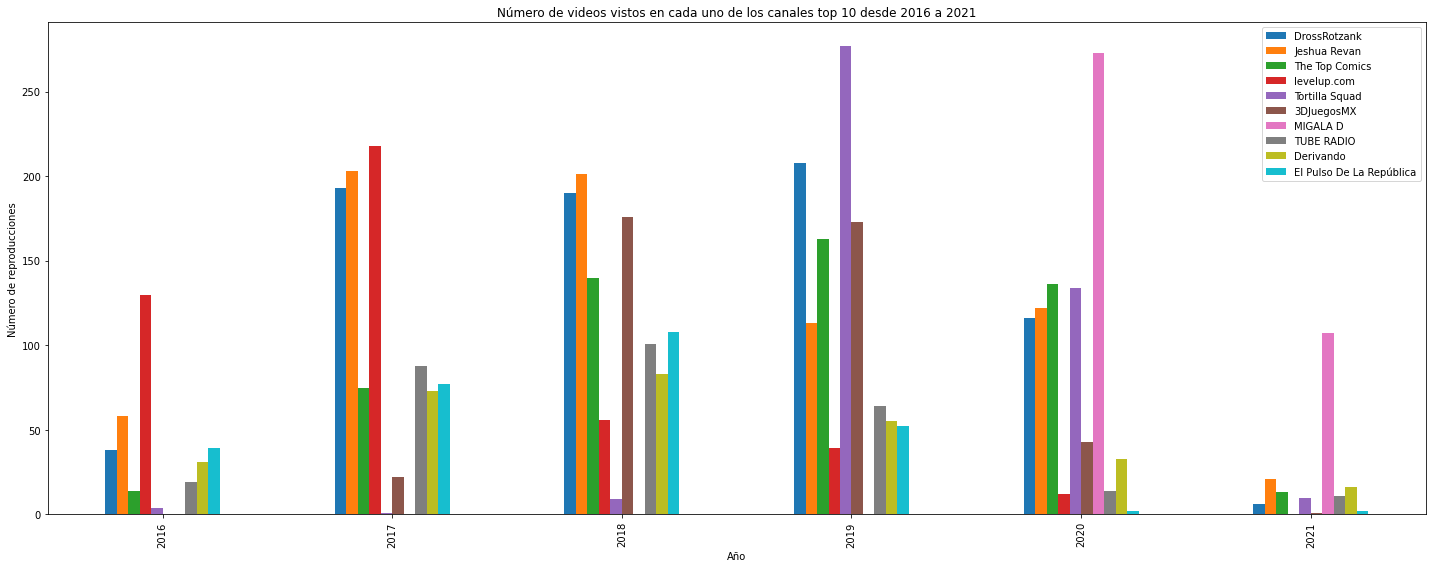

In [ ]:
Vistas_Canal_Year.plot(kind = 'bar',figsize=(20,8))
plt.title('Número de videos vistos en cada uno de los canales top 10 desde 2016 a 2021')
plt.xlabel('Año')
plt.ylabel('Número de reproducciones')
plt.tight_layout()

Imprimimos un gráfico de barras que contenga solamente los 5 canales más vistos durante 2016 a 2021

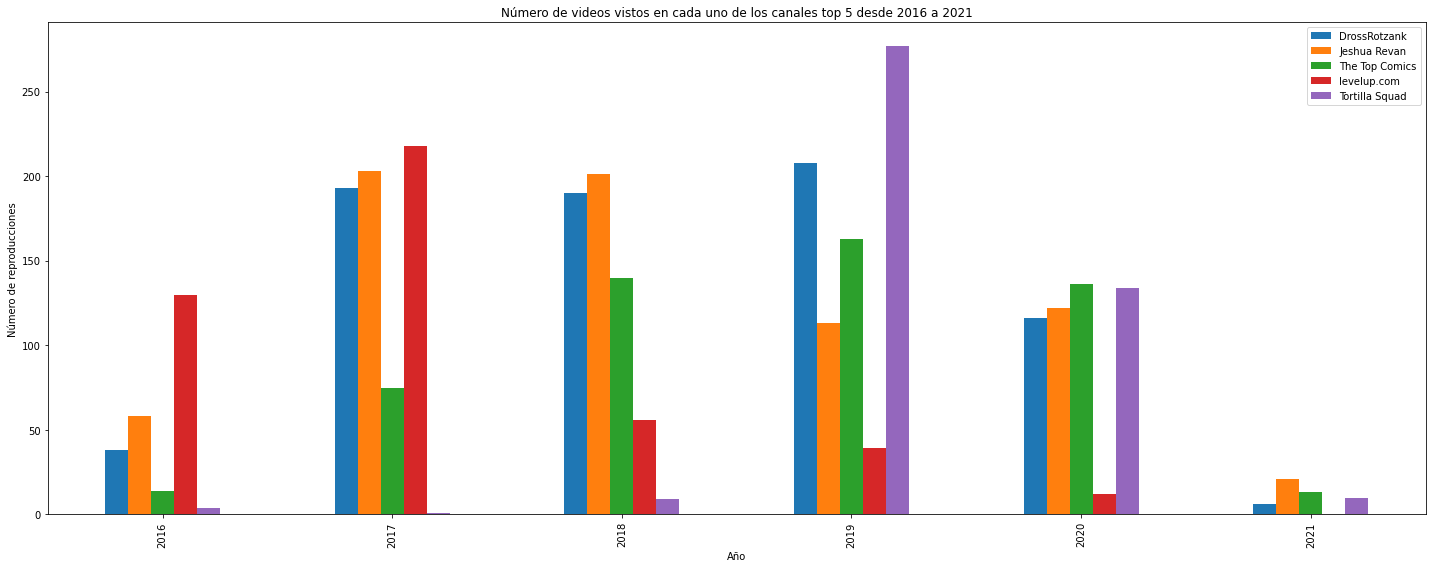

In [ ]:
Vistas_Canal_Year.iloc[:,:5].plot(kind = 'bar',figsize=(20,8))
plt.title('Número de videos vistos en cada uno de los canales top 5 desde 2016 a 2021')
plt.xlabel('Año')
plt.ylabel('Número de reproducciones')
plt.tight_layout()

Comparemos el consumo audiovisual del top 10 entre 2021, 2020 y 2019

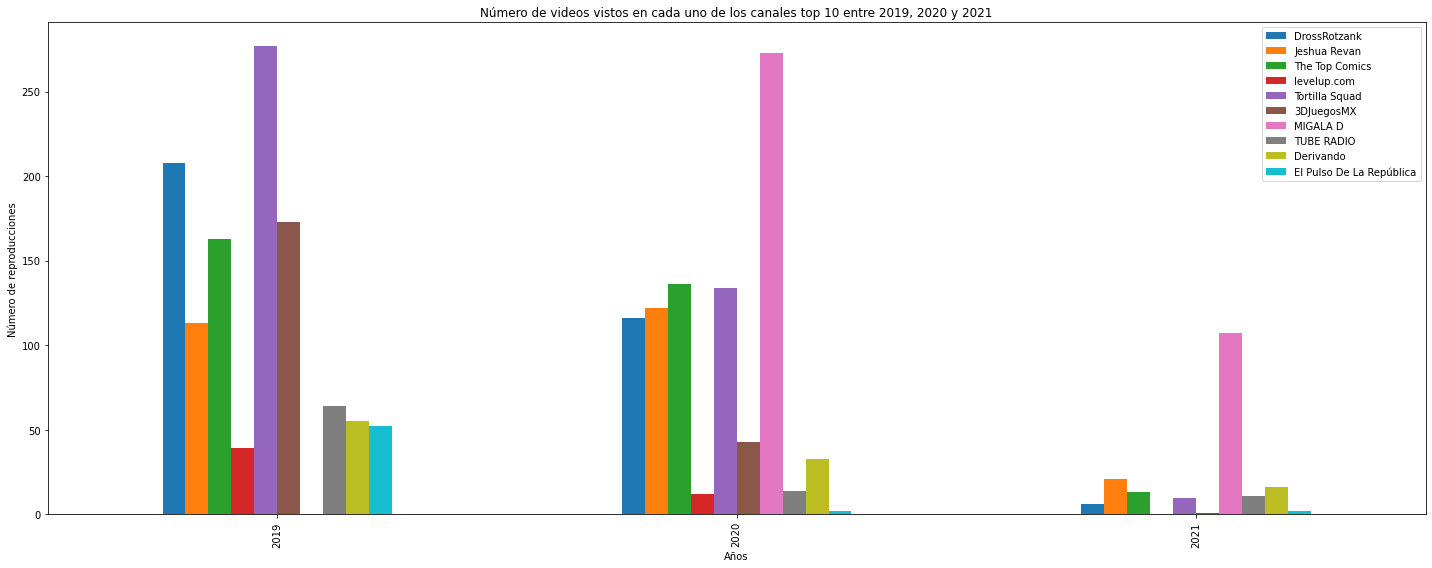

In [ ]:
Vistas_Canal_Year.loc[[2019,2020,2021]].plot(kind = 'bar',figsize=(20,8))
plt.title('Número de videos vistos en cada uno de los canales top 10 entre 2019, 2020 y 2021')
plt.xlabel('Años')
plt.ylabel('Número de reproducciones')
plt.savefig('Consumo_Audiovisual_19-20-21.pdf',format = 'pdf')
plt.tight_layout()